# Import&nbsp;libraries
---

In [ ]:
#Data process
import pandas as pd
import itertools
import numpy as np

# Text process
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tag import UnigramTagger,pos_tag
from nltk import bigrams, ngrams
import re


# Plots
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# Outils
---

In [ ]:
def list_counter(lst):
    serie = pd.Series(lst)
    return serie.value_counts()

In [ ]:
def tokenize(x):
    try :
        return word_tokenize(x)
    except:
        return None

In [ ]:
def frequency_list(lst):
    counts = list_counter(lst)
    total = len(lst)
    freq = np.array(counts) / total
    freg = freq * 100
    return pd.Series(freg.round(2), counts.index)

In [ ]:
def print_top_10(df, col):
    res = df[col].head(20)
    for el in res:
        print(f'    - {el}')

# Chargement DF
---

In [ ]:
# for i in range(1,18):
#     try :
#         tmp_df=pd.read_csv(f'./OpenfoodfactDataset/openfoodfacts_part{i}.csv',sep='\t',encoding='UTF-8')
#         df = pd.concat([df, tmp_df], ignore_index=True)
#     except ValueError as e:
#         print(e)

PS : Pour avoir notre dataset, nous avons concatener 18 csv chacun contenant 50 000 lignes du dataset initial

# Exploration & Cleaning
---

In [ ]:
col_names=[]
for x in df.columns:
    col_names.append(x)

In [ ]:
index=0
for i in (df.loc[6]):
    print(str(col_names[index])+" : "+str(i))
    index+=1

code : 0000000000100
url : http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille
creator : del51
created_t : 1444572561
created_datetime : 2015-10-11T14:09:21Z
last_modified_t : 1444659212
last_modified_datetime : 2015-10-12T14:13:32Z
product_name :  moutarde au moût de raisin 
abbreviated_product_name : nan
generic_name : nan
quantity : 100g
packaging : nan
packaging_tags : nan
packaging_text : nan
brands : courte paille
brands_tags : courte-paille
categories : Epicerie, Condiments, Sauces, Moutardes
categories_tags : en:groceries,en:condiments,en:sauces,en:mustards
categories_en : Groceries,Condiments,Sauces,Mustards
origins : nan
origins_tags : nan
origins_en : nan
manufacturing_places : nan
manufacturing_places_tags : nan
labels : Delois france
labels_tags : fr:delois-france
labels_en : fr:delois-france
emb_codes : nan
emb_codes_tags : nan
first_packaging_code_geo : nan
cities : nan
cities_tags : nan
purchase_places : nan
stores : courte p

In [ ]:
id_cols = ['code','product_name']

In [ ]:
df.head()

,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1630484064,2021-09-01T08:14:24Z,L.casei,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in range(len(df.columns)) :
    print(df.dtypes.index[i], ' : ', df.dtypes[i])

code  :  object
url  :  object
creator  :  object
created_t  :  int64
created_datetime  :  object
last_modified_t  :  int64
last_modified_datetime  :  object
product_name  :  object
abbreviated_product_name  :  object
generic_name  :  object
quantity  :  object
packaging  :  object
packaging_tags  :  object
packaging_text  :  object
brands  :  object
brands_tags  :  object
categories  :  object
categories_tags  :  object
categories_en  :  object
origins  :  object
origins_tags  :  object
origins_en  :  object
manufacturing_places  :  object
manufacturing_places_tags  :  object
labels  :  object
labels_tags  :  object
labels_en  :  object
emb_codes  :  object
emb_codes_tags  :  object
first_packaging_code_geo  :  object
cities  :  float64
cities_tags  :  object
purchase_places  :  object
stores  :  object
countries  :  object
countries_tags  :  object
countries_en  :  object
ingredients_text  :  object
allergens  :  object
allergens_en  :  float64
traces  :  object
traces_tags  :  objec

##  Nutrition Col

In [ ]:
all_nutrition_cols = [x for x in col_names if '_100g' in x]

In [ ]:
print('Pourcentage de valeurs Null par colonnes :\n')

i=0

nutrition_col_to_keep = []

for col in all_nutrition_cols:
    res = (df[col].isnull().sum() / len(df)) * 100
    res = round(res,2)
    if res < 70:
        nutrition_col_to_keep.append(col)
        i += 1
        print(f'   - {col} : {res}%')
        
print("\nNombre colonnes : " , i)

Pourcentage de valeurs Null par colonnes :

   - energy-kcal_100g : 18.62%
   - energy_100g : 16.89%
   - fat_100g : 17.17%
   - saturated-fat_100g : 21.73%
   - trans-fat_100g : 69.61%
   - cholesterol_100g : 69.15%
   - carbohydrates_100g : 17.23%
   - sugars_100g : 19.03%
   - fiber_100g : 61.53%
   - proteins_100g : 17.14%
   - salt_100g : 19.71%
   - sodium_100g : 19.71%
   - calcium_100g : 69.62%
   - iron_100g : 69.79%
   - nutrition-score-fr_100g : 53.99%

Nombre colonnes :  15


In [ ]:
nutrition_col_to_keep

['energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition-score-fr_100g']

### Valeur moyenne des composants nutritionnels

In [ ]:
viz1=pd.DataFrame(df.iloc[:,10:].mean().sort_values(ascending=False),columns=['Mean value'])
viz1.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Mean value
carbohydrates_100g,27.796542
fat_100g,13.227092
sugars_100g,13.073532
proteins_100g,9.392422
nutrition-score-fr_100g,9.128108
saturated-fat_100g,5.279597
fiber_100g,2.858071
salt_100g,2.642948
sodium_100g,1.057228
calcium_100g,0.192252


## Ingredients

In [ ]:
ingredients_col = ['ingredients_text']

In [ ]:
print('Pourcentage de valeurs Null par colonnes :\n')

for col in ingredients_col:
    res = (df[col].isnull().sum() / len(df)) * 100
    res = round(res,2)
    print(f'   - {col} : {res}%')

Pourcentage de valeurs Null par colonnes :

   - ingredients_text : 48.27%


In [ ]:
head_ing = df[~df['ingredients_text'].isnull()]['ingredients_text'].head(10)

In [ ]:
for el in head_ing:
    print(el)
    print()

Leche semidesnatada, azucar 6.9% leche desnatada en polva, fermentos lacticos (contiene Lactobacidus casei), vitaminas (B6 y D).

eau graines de téguments de moutarde vinaigre de vin rouge sel vin rouge sucre   moût de raisin (6.2%) oignons colorants extraits de carotte et extrait de paprika huile de tournesol son de moutarde sel (cette _moutarde_ uniquement disponible chez courte paille)

antioxydant : érythorbate de sodium, colorant : caramel - origine UE), tomate 33,3%, MAYONNAISE 11,1% (huile de colza 78,9%, eau, jaunes d'OEUF 6%, vinaigre, MOUTARDE [eau, graines de MOUTARDE, sel, vinaigre, curcuma], sel, dextrose, stabilisateur : gomme de cellulose, conservateur : sorbate de potassium, colorant : ?-carotène, arôme)

Lait entier, sucre, amidon de maïs, cacao, Agar agar.

baguette Poite vin Pain baguette 50,6%: farine de BLÉ, eau, sel, levure, GLUTEN, farine de BLE maité, levure désactivée, acide ascorbique, Garniture FROMAGE mi-chèvre 46% (LAIT pasteurisé [95 0% LAIT de vache, 5 0%

## Categories

In [ ]:
[x for x in df.columns if 'catego' in x]

['categories',
 'categories_tags',
 'categories_en',
 'main_category',
 'main_category_en']

In [ ]:
categories_col = ['categories', 'categories_tags', 'categories_en','main_category','main_category_en']

In [ ]:
print('Pourcentage de valeurs Null par colonnes :\n')

for col in categories_col:
    res = (df[col].isnull().sum() / len(df)) * 100
    res = round(res,2)
    print(f'   - {col} : {res}%')

Pourcentage de valeurs Null par colonnes :

   - categories : 42.02%
   - categories_tags : 42.02%
   - categories_en : 42.02%
   - main_category : 42.02%
   - main_category_en : 42.02%


In [ ]:
main_cate_df=df['main_category_en'].dropna()

In [ ]:
main_cate_df

6                                  Mustards
7                                    fr:xsf
16                             Almond paste
17                Seasoned shredded carrots
26                             Coconut pies
                        ...                
849993                        From 4 months
849994                Unsweetened beverages
849995    Baby follow-on milk from 5 months
849998                    Compotes to drink
849999                             Compotes
Name: main_category_en, Length: 492855, dtype: object

### Traitement text sur les catégories

In [ ]:
text=main_cate_df.tolist()

In [ ]:
text = ' '.join(text).lower()

In [ ]:
text=text.replace('fr:','')

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
res=word_tokenize(text)

In [ ]:
res=[lemmatizer.lemmatize(word) for word in res]

In [ ]:
res=' '.join(res).lower()

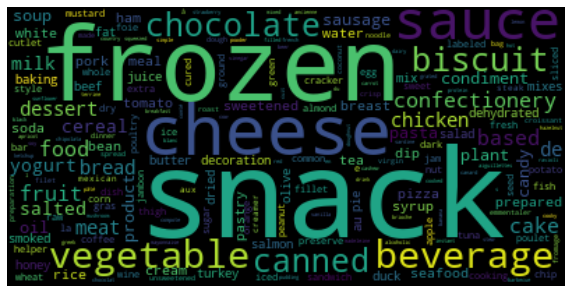

In [ ]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=False).generate(res)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

# Selection colonnes
---

In [ ]:
cols_to_keep = id_cols + categories_col + ingredients_col + nutrition_col_to_keep

In [ ]:
print('Pourcentage de valeurs Null par colonnes :\n')
for col in cols_to_keep:
    res = (df[col].isnull().sum() / len(df)) * 100
    res = round(res,2)
    print(f'   - {col} : {res}%')

Pourcentage de valeurs Null par colonnes :

   - code : 0.0%
   - product_name : 3.1%
   - categories : 42.02%
   - categories_tags : 42.02%
   - categories_en : 42.02%
   - main_category : 42.02%
   - main_category_en : 42.02%
   - ingredients_text : 48.27%
   - energy-kcal_100g : 18.62%
   - energy_100g : 16.89%
   - fat_100g : 17.17%
   - saturated-fat_100g : 21.73%
   - trans-fat_100g : 69.61%
   - cholesterol_100g : 69.15%
   - carbohydrates_100g : 17.23%
   - sugars_100g : 19.03%
   - fiber_100g : 61.53%
   - proteins_100g : 17.14%
   - salt_100g : 19.71%
   - sodium_100g : 19.71%
   - calcium_100g : 69.62%
   - iron_100g : 69.79%
   - nutrition-score-fr_100g : 53.99%


In [ ]:
final_df = df[cols_to_keep]

# Calcul de la nouvelle colonne
---

In [ ]:
final_df.columns[8:]

Index(['energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [ ]:
final_df['valeurs_nutritionnelles_list']=pd.Series(dtype='str')

In [ ]:
for i in range(len(final_df)):
    val_nutri=''
    for idx_col in range(8,len(final_df.loc[0])):
        if str(final_df.loc[i][idx_col]) != 'nan':
            
            val_nutri+=(final_df.columns[idx_col]+ " "+str(final_df.loc[i][idx_col])+" ")
    final_df['valeurs_nutritionnelles_list'][i]=val_nutri

In [ ]:
print("Product name : " + df['product_name'][849996])
print("Liste nutritionnelle : "+ df['valeurs_nutritionnelles_list'][849996])

Product name : Compote banane framboise lait de coco acérola
Liste nutritionnelle : energy-kcal_100g 77.0 energy_100g 322.0 fat_100g 2.1 saturated-fat_100g 1.8 carbohydrates_100g 13.0 sugars_100g 11.0 proteins_100g 0.7 salt_100g 0.01 sodium_100g 0.004 


---
# Question 1
---

## Séparation par virgule

In [ ]:
df_ingrdnnts = final_df[['ingredients_text']]

In [ ]:
df_ingrdnnts = df_ingrdnnts[~df_ingrdnnts['ingredients_text'].isnull()]

In [ ]:
df_ingrdnnts['ingredients_text'] = df_ingrdnnts['ingredients_text'].astype('str')

In [ ]:
spltd_ingrd = df_ingrdnnts['ingredients_text'].apply(lambda x : x.split(','))

In [ ]:
spltd_ingrd

0         [Leche semidesnatada,  azucar 6.9% leche desna...
1         [eau graines de téguments de moutarde vinaigre...
2         [antioxydant : érythorbate de sodium,  coloran...
3         [Lait entier,  sucre,  amidon de maïs,  cacao,...
4         [baguette Poite vin Pain baguette 50, 6%: fari...
                                ...                        
439715    [Dextrose,  extrait naturel de fleur d'oranger...
439716    [_Lactosérum_ déminéralisé*,  matières grasses...
439717    [Lait écrémé,  maltodextrines,  matières grass...
439718           [Pomme 70%,  framboise 25%,  myrtille 5%.]
439719             [Pomme* 62%,  mangue* 33%,  acérola• 5%]
Name: ingredients_text, Length: 439720, dtype: object

In [ ]:
cleaned_list_ingr = list(itertools.chain.from_iterable(spltd_ingrd))

In [ ]:
cleaned_list_ingr = pd.read_csv('comma_split_ingrd.csv')

In [ ]:
first_count = list_counter(cleaned_list_ingr)

## Tokenisation

###    - Unigram

In [ ]:
tokenised_ingr = list(df_ingrdnnts['ingredients_text'].apply(tokenize))

In [ ]:
tokenised_ingr = [str(x).lower() for x in tokenised_ingr]

In [ ]:
tokenised_without_specials = [x for x in tokenised_ingr if re.match('[a-zA-Z]+',str(x))]

In [ ]:
all_stopwords = stopwords.words()
tokenised_without_stopwords = [x for x in tokenised_without_specials if x not in all_stopwords]

In [ ]:
lemmetized_tokens = [lemmatizer.lemmatize(str(word)) for word in tokenised_without_stopwords]

In [ ]:
print(f"""
Tous les tokes : {len(tokenised_ingr)} élements

Tokens sans charctères spéciaux : {len(tokenised_without_specials)} élements

Tokens sans Stop words  {len(tokenised_without_stopwords)} élements""")


Tous les tokes : 24551140 élements

Tokens sans charctères spéciaux : 15097001 élements

Tokens sans Stop words  13457268 élements


In [ ]:
counts_tokenised_1gram = list_counter(lemmetized_tokens)

In [ ]:
freq_tokenised_1gram = frequency_list(lemmetized_tokens)

In [ ]:
for i in range(10000, 250000, 20000):
    res = sum(counts_tokenised_1gram > i)
    print(f"Nombre d'éléments cités plus de {i} fois : {res}\n")

Nombre d'éléments cités plus de 10000 fois : 237

Nombre d'éléments cités plus de 30000 fois : 91

Nombre d'éléments cités plus de 50000 fois : 56

Nombre d'éléments cités plus de 70000 fois : 30

Nombre d'éléments cités plus de 90000 fois : 20

Nombre d'éléments cités plus de 110000 fois : 13

Nombre d'éléments cités plus de 130000 fois : 13

Nombre d'éléments cités plus de 150000 fois : 12

Nombre d'éléments cités plus de 170000 fois : 11

Nombre d'éléments cités plus de 190000 fois : 6

Nombre d'éléments cités plus de 210000 fois : 4

Nombre d'éléments cités plus de 230000 fois : 4



In [ ]:
for i in np.arange(0.2, 3, 0.2):
    i = round(i,1)
    res = sum(freq_tokenised_1gram > i)
    print(f"Nombre d'éléments ayant une fréquence supérieur à {i}% : {res}\n")

Nombre d'éléments ayant une fréquence supérieur à 0.2% : 101

Nombre d'éléments ayant une fréquence supérieur à 0.4% : 50

Nombre d'éléments ayant une fréquence supérieur à 0.6% : 21

Nombre d'éléments ayant une fréquence supérieur à 0.8% : 15

Nombre d'éléments ayant une fréquence supérieur à 1.0% : 13

Nombre d'éléments ayant une fréquence supérieur à 1.2% : 12

Nombre d'éléments ayant une fréquence supérieur à 1.4% : 7

Nombre d'éléments ayant une fréquence supérieur à 1.6% : 4

Nombre d'éléments ayant une fréquence supérieur à 1.8% : 4

Nombre d'éléments ayant une fréquence supérieur à 2.0% : 1

Nombre d'éléments ayant une fréquence supérieur à 2.2% : 1

Nombre d'éléments ayant une fréquence supérieur à 2.4% : 1

Nombre d'éléments ayant une fréquence supérieur à 2.6% : 0

Nombre d'éléments ayant une fréquence supérieur à 2.8% : 0



In [ ]:
top100_ingr = list(counts_tokenised_1gram.index[:100])

In [ ]:
print('Les 100 éléments les plus cités :\n\n')

i = 0
res = ''
for el in top100_ingr : 
    i+=1
    res = res + el + '   '
    if i%10 == 0:
        print(res, '\n')
        res =''

Les 100 éléments les plus cités :


salt   oil   sugar   acid   water   flour   flavor   sodium   corn   milk    

natural   organic   wheat   syrup   powder   gum   starch   vitamin   color   citric    

cheese   sel   soybean   contains   juice   garlic   lecithin   artificial   le   spice    

calcium   onion   extract   red   palm   pepper   phosphate   sucre   potassium   enzyme    

concentrate   vinegar   dextrose   cocoa   yellow   modified   riboflavin   folic   vegetable   eau    

butter   tomato   mononitrate   iron   niacin   yeast   cream   culture   whey   chocolate    

preservative   enriched   canola   pasteurized   lait   whole   egg   rice   protein   sunflower    

farine   reduced   poudre   xanthan   huile   maltodextrin   dried   thiamine   mono   bean    

paprika   cane   caramel   white   and/or   seed   fructose   blue   arôme   guar    

nonfat   high   blé   sorbate   peanut   vanilla   diglycerides   gluten   cacao   potato    



In [ ]:
res=' '.join(top100_ingr).lower()

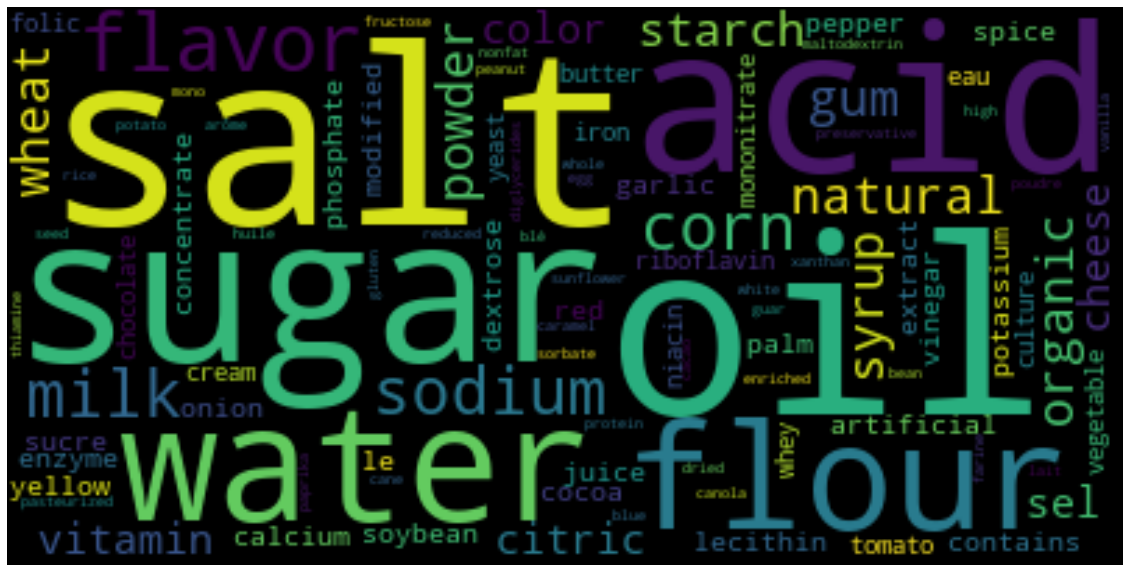

In [ ]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=False).generate(res)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [ ]:
tagged_tokens = pos_tag(counts_tokenised_1gram.index)

In [ ]:
cleaned_tagged_tokens = [x[0] for x in tagged_tokens if x[1] in['NN','NNS']]

In [ ]:
print('Les 100 éléments les plus cités :\n\n')

i = 0
res = ''
for el in cleaned_tagged_tokens[:100] : 
    i+=1
    res = res + el + '   '
    if i%10 == 0:
        print(res, '\n')
        res =''

Les 100 éléments les plus cités :


salt   oil   sugar   acid   water   flavor   sodium   corn   milk   wheat    

syrup   powder   gum   starch   vitamin   color   sel   soybean   garlic   le    

spice   calcium   onion   extract   palm   pepper   phosphate   sucre   potassium   enzyme    

concentrate   vinegar   cocoa   eau   butter   tomato   mononitrate   iron   niacin   yeast    

cream   culture   whey   canola   egg   rice   protein   farine   huile   maltodextrin    

bean   cane   caramel   and/or   seed   arôme   guar   blé   sorbate   peanut    

vanilla   diglycerides   potato   chicken   coconut   food   thiamin   fruit   lemon   sulfate    

barley   sauce   citrate   bicarbonate   cellulose   apple   skim   soda   benzoate   fat    

naturel   tournesol   chloride   kernel   sirop   dioxide   cornstarch   grain   arômes   carrageenan    

oat   tapioca   concentré   beurre   glucose   almond   beef   jus   palmitate   freshness    



* ## Bigram

In [ ]:
bigrams_ingr = [' '.join(x) for x in bigrams(tokenised_without_specials) if isinstance(x[0],str) and isinstance(x[1],str)]

In [ ]:
counts_tokenised_2gram = list_counter(bigrams_ingr)

In [ ]:
freq_tokenised_2gram = frequency_list(bigrams_ingr)

In [ ]:
for i in range(10000, 250000, 20000):
    res = sum(counts_tokenised_2gram > i)
    print(f"Nombre d'éléments cités plus de {i} fois : {res}\n")

Nombre d'éléments cités plus de 10000 fois : 161

Nombre d'éléments cités plus de 30000 fois : 29

Nombre d'éléments cités plus de 50000 fois : 7

Nombre d'éléments cités plus de 70000 fois : 3

Nombre d'éléments cités plus de 90000 fois : 2

Nombre d'éléments cités plus de 110000 fois : 0

Nombre d'éléments cités plus de 130000 fois : 0

Nombre d'éléments cités plus de 150000 fois : 0

Nombre d'éléments cités plus de 170000 fois : 0

Nombre d'éléments cités plus de 190000 fois : 0

Nombre d'éléments cités plus de 210000 fois : 0

Nombre d'éléments cités plus de 230000 fois : 0



In [ ]:
for i in np.arange(0.2, 3, 0.2):
    i = round(i,1)
    res = sum(freq_tokenised_2gram > i)
    print(f"Nombre d'éléments ayant une fréquence supérieur à {i}% : {res}\n")

Nombre d'éléments ayant une fréquence supérieur à 0.2% : 25

Nombre d'éléments ayant une fréquence supérieur à 0.4% : 4

Nombre d'éléments ayant une fréquence supérieur à 0.6% : 2

Nombre d'éléments ayant une fréquence supérieur à 0.8% : 0

Nombre d'éléments ayant une fréquence supérieur à 1.0% : 0

Nombre d'éléments ayant une fréquence supérieur à 1.2% : 0

Nombre d'éléments ayant une fréquence supérieur à 1.4% : 0

Nombre d'éléments ayant une fréquence supérieur à 1.6% : 0

Nombre d'éléments ayant une fréquence supérieur à 1.8% : 0

Nombre d'éléments ayant une fréquence supérieur à 2.0% : 0

Nombre d'éléments ayant une fréquence supérieur à 2.2% : 0

Nombre d'éléments ayant une fréquence supérieur à 2.4% : 0

Nombre d'éléments ayant une fréquence supérieur à 2.6% : 0

Nombre d'éléments ayant une fréquence supérieur à 2.8% : 0



In [ ]:
top100_ingr_2gram = list(counts_tokenised_2gram.index[:100])

In [ ]:
print('Les 100 bigrams les plus cités :\n\n')

i = 0
res = ''
for el in top100_ingr_2gram : 
    i+=1
    res = res + el + '   '
    if i%10 == 0:
        print(res, '\n')
        res =''

Les 100 bigrams les plus cités :


wheat flour   citric acid   corn syrup   soy lecithin   natural flavor   folic acid   soybean oil   corn starch   sea salt   riboflavin folic    

mononitrate riboflavin   or less   natural flavors   flour niacin   less of   xanthan gum   farine de   reduced iron   less than   salt enzymes    

contains or   canola oil   artificial flavor   palm oil   and artificial   thiamine mononitrate   flour wheat   natural and   juice concentrate   huile de    

niacin reduced   than of   vegetable oil   ascorbic acid   potassium sorbate   de blé   cane sugar   milk cheese   fructose corn   de sodium    

high fructose   iron thiamine   guar gum   caramel color   cocoa butter   garlic powder   en poudre   sunflower oil   mono and   artificial flavors    

thiamin mononitrate   pasteurized milk   and diglycerides   of the   the following   skim milk   cheese pasteurized   lactic acid   baking soda   contains less    

onion powder   water salt   modified corn   y

# Question 2 

---

## Premier K Means

In [ ]:
nutri = ['energy-kcal_100g',
 'fat_100g']

In [ ]:
df_m = df[nutri].fillna(0)

In [ ]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850000 entries, 0 to 849999
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   energy-kcal_100g  850000 non-null  float64
 1   fat_100g          850000 non-null  float64
dtypes: float64(2)
memory usage: 13.0 MB


In [ ]:
df_m.describe()

,energy-kcal_100g,fat_100g
count,8.500000e+05,850000.000000
mean,1.045739e+05,10.955891
std,9.615167e+07,38.275926
min,0.000000e+00,0.000000
25%,2.600000e+01,0.000000
50%,1.790000e+02,3.400000
75%,3.670000e+02,17.307692
max,8.864745e+10,29000.000000


In [ ]:
df_k = df_m.head(100000)

In [ ]:
df_1 = df_m[(df_m < df_m.quantile(0.75)) & (df_m > df_m.quantile(0.25))]

In [ ]:
df_1 = df_1.dropna()

In [ ]:
df_1.describe()

,energy-kcal_100g,fat_100g
count,275936.000000,275936.000000
mean,177.173747,5.935409
std,91.606873,4.812251
min,26.056338,0.000001
25%,104.000000,1.790000
50%,163.000000,4.500000
75%,244.000000,9.600000
max,366.670000,17.300000


[[110.03738949   1.90263541]
 [ 47.55348586   1.11215634]
 [151.44172007   1.81260715]
 [ 81.29031647   1.47429352]]


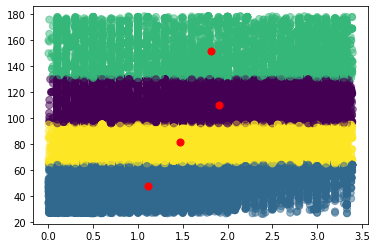

In [ ]:
kmeans = KMeans(n_clusters=4).fit(df_1)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df_1['fat_100g'], df_1['energy-kcal_100g'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=50)
plt.show()

## Deuxième K Means

In [ ]:
nutrition_cols = [col for col in df.columns if '_100g' in col]

In [ ]:
new_df = df[nutrition_cols].dropna()

In [ ]:
new_df

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
286,300.0,1255.0,0.000000,0.000000,0.000,0.00000,83.330000,66.670000,10.000,0.00,0.000000,0.000000,0.0000,0.000000,3.0
386,260.0,1090.0,10.700000,2.000000,0.667,0.00533,38.700000,24.700000,2.000,3.33,0.647000,0.259000,0.0133,0.000480,9.0
403,278.0,1160.0,1.110000,0.333000,0.000,0.00000,53.300000,1.110000,2.220,10.00,1.520000,0.610000,0.0222,0.006000,2.0
432,114.0,478.0,6.790000,2.860000,0.000,0.01070,7.860000,0.714000,0.357,5.36,0.499000,0.200000,0.0286,0.000643,2.0
504,128.0,536.0,6.000000,1.000000,0.000,0.00000,50.000000,19.000000,1.000,7.00,0.000000,0.000000,0.0000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811920,390.0,1632.0,38.000000,27.400000,1.070,0.16400,2.000000,1.000000,0.000,10.00,1.000000,0.400000,0.1070,0.000000,13.0
812936,209.0,874.0,13.000000,3.100000,3.500,0.03600,0.000000,0.000000,1.800,23.00,1.000000,0.400000,0.0910,0.002290,3.0
821429,200.0,837.0,16.666667,1.333333,0.000,0.00000,6.666667,6.666667,0.000,0.00,3.166667,1.266667,0.0200,0.000000,14.0
821430,35.0,146.0,2.500000,0.200000,0.000,0.00500,2.000000,1.000000,0.000,0.20,0.100000,0.040000,0.0400,0.001080,0.0


In [ ]:
new_kmeans = KMeans().fit(new_df)

In [ ]:
new_df['cluster'] = new_kmeans.labels_

In [ ]:
prd_names = df['product_name'].loc[new_df.index]

In [ ]:
cats_name = df['categories_en'].loc[new_df.index]

In [ ]:
new_df['cats'] = cats_name

In [ ]:
new_df['names'] = prd_names 

In [ ]:
for i in range(9):
    tmp_df = new_df[new_df['cluster'] == i]
    tmp_df = tmp_df.sample(frac=1)
    print(f'Produit du cluster {i} :\n')
    print_top_10(tmp_df,'cats')
    print()

Produit du cluster 0 :

    - Meats,Prepared meats
    - Beverages
    - Plant-based foods and beverages,Plant-based foods,Canned foods,Fruits and vegetables based foods,Canned plant-based foods,Vegetables based foods,Canned vegetables
    - Beverages
    - Plant-based foods and beverages,Plant-based foods,Canned foods,Fruits and vegetables based foods,Canned plant-based foods,Vegetables based foods,Canned vegetables
    - Plant-based foods and beverages,Plant-based foods,Fruits and vegetables based foods,Vegetables based foods,Tomatoes and their products,Tomatoes
    - Groceries,Sauces
    - Beverages,Carbonated drinks,Sodas
    - Groceries,Sauces,Dips
    - Plant-based foods and beverages,Plant-based foods,Fruits and vegetables based foods,Frozen foods,Vegetables based foods,Frozen plant-based foods,Frozen vegetables
    - Dairies,Milks
    - Plant-based foods and beverages,Plant-based foods,Canned foods,Fruits and vegetables based foods,Canned plant-based foods,Vegetables based food

In [ ]:
new_df.groupby('cluster').count()

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,names
cluster,,,,,,,,,,,,,,,,
0,49737,49737,49737,49737,49737,49737,49737,49737,49737,49737,49737,49737,49737,49737,49737,49732
1,47625,47625,47625,47625,47625,47625,47625,47625,47625,47625,47625,47625,47625,47625,47625,47614
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,29202,29202,29202,29202,29202,29202,29202,29202,29202,29202,29202,29202,29202,29202,29202,29201
4,20021,20021,20021,20021,20021,20021,20021,20021,20021,20021,20021,20021,20021,20021,20021,20020
5,34798,34798,34798,34798,34798,34798,34798,34798,34798,34798,34798,34798,34798,34798,34798,34795
6,2393,2393,2393,2393,2393,2393,2393,2393,2393,2393,2393,2393,2393,2393,2393,2392
7,31927,31927,31927,31927,31927,31927,31927,31927,31927,31927,31927,31927,31927,31927,31927,31921


In [ ]:
centers = list(new_kmeans.cluster_centers_)

In [ ]:
centers = pd.DataFrame(centers)

In [ ]:
centers.columns = new_df.columns

In [ ]:
centers.describe()

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,5324.486993,22232.305392,77.191451,12.615867,0.042312,0.029338,340.384686,111.923678,27.830848,44.823894,2.979961,1.194484,0.075602,0.015141,13.148852
std,14012.769337,58502.310505,152.557730,16.275231,0.038697,0.020567,872.825981,278.146892,69.582929,103.145061,5.351244,2.147556,0.048851,0.035527,10.333943
min,54.259320,226.163693,0.932760,0.300810,0.000000,0.000000,9.134330,3.024838,1.244074,2.933743,0.475444,0.190175,0.000000,0.000680,0.748925
25%,231.506292,967.996689,9.461518,3.671153,0.014226,0.013936,15.258412,7.491920,2.077534,7.566395,1.018347,0.407339,0.047991,0.001516,8.260928
50%,415.620385,1738.896313,17.299986,6.708673,0.034702,0.028114,36.656535,15.279133,3.734274,8.762353,1.173921,0.469568,0.072298,0.003096,11.139407
75%,606.326659,2536.867741,48.974340,13.495199,0.057110,0.050754,56.047276,22.984173,4.809484,11.269414,1.360530,0.544209,0.096280,0.004110,16.051780
max,40000.000000,167000.000000,450.000000,50.000000,0.117955,0.052647,2500.000000,800.000000,200.000000,300.000000,16.200000,6.500000,0.163443,0.103000,35.000000


In [ ]:
col_to_clean = [col for col in centers.columns if centers[col].std() > 100]

In [ ]:
test = pd.DataFrame(new_df)

In [ ]:
for col in col_to_clean:
    test = test[test[col] < test[col].quantile(.9)]

In [ ]:
test.describe()

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,112710.000000,112710.000000,112710.000000,112710.000000,112710.000000,112710.000000,112710.000000,112710.000000,112710.000000,112710.000000,112710.000000,112710.000000,112710.000000,112710.000000,112710.000000
mean,165.091310,690.555234,5.194486,1.806059,0.018287,0.027930,24.529066,7.462544,2.084674,5.291304,1.240506,0.496202,0.064624,0.001478,4.220673
std,121.243762,507.228840,5.839513,2.823434,0.584474,0.950519,21.588525,7.959548,3.061472,4.570559,6.645033,2.658013,0.349863,0.024449,7.296858
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000
25%,59.000000,247.000000,0.000000,0.000000,0.000000,0.000000,7.380000,1.670000,0.000000,1.250000,0.125000,0.050000,0.000000,0.000000,-1.000000
50%,133.000000,556.000000,2.780000,0.134500,0.000000,0.000000,16.670000,4.050000,1.300000,4.000000,0.625000,0.250000,0.033000,0.000640,3.000000
75%,254.000000,1063.000000,9.290000,2.680000,0.000000,0.015000,35.000000,10.830000,2.800000,8.670000,1.206448,0.482579,0.096000,0.001690,11.000000
max,475.000000,1920.000000,21.428600,80.000000,130.000000,116.915000,76.669998,30.750000,100.000000,17.010000,1139.151900,455.660760,55.357000,4.628570,30.000000


In [ ]:
new_kmeans = KMeans().fit(test)

In [ ]:
test['cluster'] = new_kmeans.labels_

In [ ]:
prd_names = df['product_name'].loc[test.index]

In [ ]:
cats_name = df['categories_en'].loc[test.index]

In [ ]:
test['cats'] = cats_name

In [ ]:
test['names'] = prd_names 

In [ ]:
def print_top_10(df, col):
    res = df[col].head(20)
    for el in res:
        print(f'    - {el}')

In [ ]:
for i in range(9):
    tmp_df = test[test['cluster'] == i]
    tmp_df = tmp_df.sample(frac=1)
    print(f'Produit du cluster {i} :\n')
    print_top_10(tmp_df,'cats')
    print()

Produit du cluster 0 :

    - Groceries,Sauces
    - Plant-based foods and beverages,Plant-based foods,Fruits and vegetables based foods,Frozen foods,Vegetables based foods,Frozen plant-based foods,Frozen vegetables
    - Beverages,Iced teas
    - Plant-based foods and beverages,Plant-based foods,Canned foods,Fruits and vegetables based foods,Canned plant-based foods,Fruits based foods,Canned fruits
    - Plant-based foods and beverages,Plant-based foods,Canned foods,Fruits and vegetables based foods,Canned plant-based foods,Vegetables based foods,Canned vegetables
    - Plant-based foods and beverages,Plant-based foods,Fruits and vegetables based foods,Frozen foods,Vegetables based foods,Frozen plant-based foods,Frozen vegetables
    - Plant-based foods and beverages,Beverages,Plant-based beverages
    - Beverages
    - Plant-based foods and beverages,Plant-based foods,Canned foods,Fruits and vegetables based foods,Canned plant-based foods,Vegetables based foods,Canned vegetables
    

In [ ]:
for i in range(9):
    tmp_df = test[test['cluster'] == i]
    cnt =  pd.DataFrame(tmp_df['cats'].value_counts()).reset_index()
    print(f'Produit du cluster {i} :\n')
    print_top_10(cnt,'index')
    print()

Produit du cluster 0 :

    - Plant-based foods and beverages,Plant-based foods,Canned foods,Fruits and vegetables based foods,Canned plant-based foods,Vegetables based foods,Canned vegetables
    - Plant-based foods and beverages,Plant-based foods,Fruits and vegetables based foods
    - Plant-based foods and beverages,Plant-based foods,Fruits and vegetables based foods,Vegetables based foods,Tomatoes and their products,Tomatoes
    - Plant-based foods and beverages,Plant-based foods,Fruits and vegetables based foods,Frozen foods,Vegetables based foods,Frozen plant-based foods,Frozen vegetables
    - Groceries,Sauces,Dips
    - Plant-based foods and beverages,Beverages,Plant-based beverages
    - Salted-snacks
    - Canned foods,Meals,Soups,Canned meals,Canned soups
    - Groceries,Sauces
    - Beverages
    - Dairies,Milks
    - Plant-based foods and beverages,Beverages,Plant-based beverages,Milk substitute,Plant milks
    - Groceries,Condiments
    - Beverages,Iced teas
    - Meals,S

## Troisième K Means

In [ ]:
tokenised_cat = df['categories_en'].apply(tokenize)

In [ ]:
tokenised_cat

0       [Plant-based, foods, and, beverages, ,, Plant-...
1       [Snacks, ,, Sweet, snacks, ,, Biscuits, and, c...
2                                       [fr, :, boulange]
3       [Meals, ,, Pizzas, pies, and, quiches, ,, Quic...
4       [Snacks, ,, Sweet, snacks, ,, Biscuits, and, c...
                              ...                        
9995    [Plant-based, foods, and, beverages, ,, Plant-...
9996    [Plant-based, foods, and, beverages, ,, Plant-...
9997    [Plant-based, foods, and, beverages, ,, Plant-...
9998    [Snacks, ,, Sweet, snacks, ,, Bars, ,, Cereal,...
9999    [Snacks, ,, Sweet, snacks, ,, Biscuits, and, c...
Name: cats, Length: 10000, dtype: object

In [ ]:
tokenised_cat = [[str(x).lower() for x in el] for el in tokenised_cat]

In [ ]:
cat_without_specials = [[x for x in el if re.match('[a-zA-Z]+',str(x))] for el in tokenised_cat]

In [ ]:
cat_without_specials = [[x for x in el if len(x)>2] for el in cat_without_specials]

In [ ]:
cat_without_stopwords = [[x for x in el if x not in all_stopwords] for el in cat_without_specials]

In [ ]:
lemmetized_cat = [[lemmatizer.lemmatize(str(word)) for word in el] for el in cat_without_stopwords]

In [ ]:
mymodel = Word2Vec(lemmetized_cat, min_count=1)

In [ ]:
def get_full_vect(phrase):
    all_vectors = []
    for mot in phrase:
        all_vectors.append(mymodel.wv[mot])
    return np.array(all_vectors).mean(axis=0)

In [ ]:
x = [get_full_vect(lst) for lst in lemmetized_cat]

In [ ]:
new_kmeans = KMeans().fit(x)

In [ ]:
test = pd.DataFrame(df['product_name'])

In [ ]:
test['cluster'] = new_kmeans.labels_

In [ ]:
cats_name = df['categories_en']

In [ ]:
test['cats'] = cats_name

In [ ]:
def print_top_10(df, col):
    res = df[col].head(20)
    for el in res:
        print(f'    - {el}')

#### Catégories les plus représentés par cluster

In [ ]:
for i in range(9):
    tmp_df = test[test['cluster'] == i]
    cnt =  pd.DataFrame(tmp_df['cats'].value_counts()).reset_index()
    print(f'Produit du cluster {i} :\n')
    print_top_10(cnt,'index')
    print()

Produit du cluster 0 :

    - Canned foods,Meals,Soups,Canned meals,Canned soups
    - Meals,Pizzas pies and quiches,Pizzas
    - Meals,Soups
    - Meals,Pasta dishes
    - Meals
    - Meals,Stews
    - Meals,Salads,Prepared salads
    - Meals,Rice dishes
    - Meals,Pizzas pies and quiches,Pizzas,Pizza-crust
    - Meals,Vegetable-mixes
    - Groceries,Canned foods,Meals,Soups,Broths,Canned meals,Beef broth,Canned soups
    - Meals,Pasta dishes,Salads,Prepared salads,Pasta salads
    - Meals,Salads,Prepared salads,Potato dishes,Potato salads,Salted-snacks
    - Meals,Pizzas pies and quiches,Pizzas,Cheese pizzas
    - Meals,Salads,Meals with fish,Prepared salads,Tuna salad
    - Meals,Meat-based products,Meals with meat,Poultry meals,Meals with chicken,Stews
    - Meals,Pizzas pies and quiches,Quiches,Lorraine quiche
    - Meals,Pizzas pies and quiches,Pizzas,Pepperoni pizzas
    - Meals,Microwave meals
    - Canned foods,Meals,Soups,Canned meals,Canned soups,Chowders

Produit du cluste

## PCA Plot

In [ ]:
pca = PCA(2)
res = pca.fit_transform(x)

In [ ]:
ax_1 = [el[0] for el in res]

In [ ]:
ax_2 = [el[1] for el in res]

In [ ]:
test['ax_1'] = ax_1

In [ ]:
test['ax_2'] = ax_2

<AxesSubplot:xlabel='ax_1', ylabel='ax_2'>

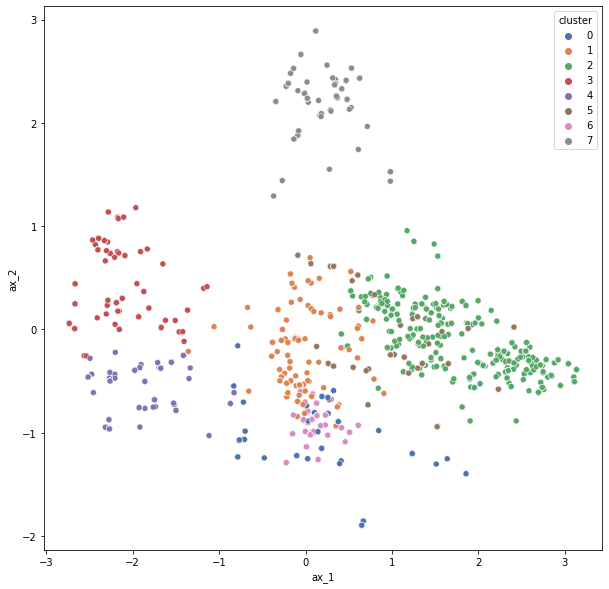

In [ ]:
fig = plt.figure(figsize=(10,10))

sns.scatterplot(x='ax_1',y='ax_2',hue='cluster',palette="deep",data=test)

## Elbow method

In [ ]:
K = range(15,250,30)

wss = []
for k in K:
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(x)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [ ]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})

<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

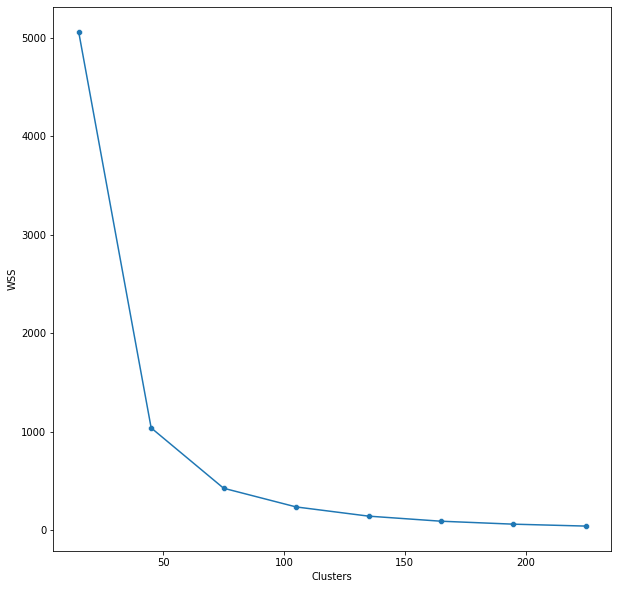

In [ ]:
fig = plt.figure(figsize=(10,10))

sns.scatterplot(x='Clusters',y='WSS',,data=mycenters)
sns.lineplot(x='Clusters',y='WSS',markers=True,data=mycenters)